In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from selenium.webdriver.common.by import By
driver = webdriver.Chrome(service = Service('../chromedriver_win32/chromedriver.exe'))

In [12]:
url = 'https://www.instagram.com/'
driver.get(url)

In [13]:
url = 'https://www.instagram.com/'
driver.get(url)
email = 'gi93008@naver.com' # 계정 정보 수정 필요
input_id = driver.find_elements(By.NAME,'username')[0]
input_id.clear()
input_id.send_keys(email)
password = 'dhkthkthk11!' # 계정 정보 수정 필요
input_pw = driver.find_elements(By.NAME,'password')[0]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(5)

In [14]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    
    return url
def insta_select(word):
    url = 'https://www.instagram.com/' + word
    return url

In [15]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(5)

In [16]:
from selenium.webdriver.common.by import By

#first = driver.find_element_by_css_selector('div_9AhH0)
first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
first.click()

In [18]:
BeautifulSoup(driver.page_source,'html.parser').select('div.Nm9Fw > a > span')[0].text

IndexError: list index out of range

In [19]:
from selenium.webdriver.common.by import By

def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(5)
select_first(driver)

ElementClickInterceptedException: Message: element click intercepted: Element <div class="_9AhH0"></div> is not clickable at point (158, 453). Other element would receive the click: <div aria-label="제어" class="fXIG0" role="button" tabindex="0"></div>
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x0088FDC3+2555331]
	Ordinal0 [0x008277F1+2127857]
	Ordinal0 [0x00722E08+1060360]
	Ordinal0 [0x007548CF+1263823]
	Ordinal0 [0x00752B10+1256208]
	Ordinal0 [0x0075076B+1247083]
	Ordinal0 [0x0074F559+1242457]
	Ordinal0 [0x00744FB3+1200051]
	Ordinal0 [0x00767B0C+1342220]
	Ordinal0 [0x00744984+1198468]
	Ordinal0 [0x00767C14+1342484]
	Ordinal0 [0x007775FA+1406458]
	Ordinal0 [0x00767976+1341814]
	Ordinal0 [0x007436B6+1193654]
	Ordinal0 [0x00744546+1197382]
	GetHandleVerifier [0x00A29622+1619522]
	GetHandleVerifier [0x00AD882C+2336844]
	GetHandleVerifier [0x009223E1+541697]
	GetHandleVerifier [0x00921443+537699]
	Ordinal0 [0x0082D18E+2150798]
	Ordinal0 [0x00831518+2168088]
	Ordinal0 [0x00831660+2168416]
	Ordinal0 [0x0083B330+2208560]
	BaseThreadInitThunk [0x7724FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77BE7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77BE7A6E+238]


In [ ]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [ ]:
import unicodedata

content = soup.select('div.C4VMK > span')[0].text
content = unicodedata.normalize('NFC',content)

content

In [ ]:
import re # 글자를 다루게 해주는 모듈 (태그를 따로 뽑아줌)

tags = re.findall(r'#[^\s#,\\]+' ,content) # \w+ w = word 연속해서 뽑아라 # []은 or을 뜻한다 ^ :not
#tags = re.findall(r'#\w+' ,content) # 전부다 뽑기
tags

In [20]:
print(r'\n')  # https://wikidocs.net/4308

\n


In [21]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

NameError: name 'soup' is not defined

In [22]:
like = soup.select('a.zV_Nj > span')[0].text
#like

NameError: name 'soup' is not defined

In [23]:
place = soup.select('div.JF9hh > a.O4GlU')[0].text
place = unicodedata.normalize('NFC',place)
place

NameError: name 'soup' is not defined

In [24]:
def get_content(driver):
    soup = BeautifulSoup(driver.page_source,'html.parser')
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC',content)
    except:
        content = ''
    try:
        tags = re.findall(r'#[^\s#,\\]+' ,content)
    except:
        tags = ''
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    try:
        like = soup.select('a.zV_Nj > span')[0].text
    except:
        like = 0
    try:
        place = soup.select('div.JF9hh > a.O4GlU')[0].text
        place = unicodedata.normalize('NFC',place)
    except:
        place = ''
    data = [content,date,like,place,tags]
    return data

In [25]:
mylist = get_content(driver)
mylist

['', '2022-01-17', 0, '', '']

In [26]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)

move_next(driver)

In [27]:
def login(id,pw,driver):
    url = 'https://www.instagram.com/'
    driver.get(url)
    email = '{}'.format(id) # 계정 정보 수정 필요
    input_id = driver.find_elements(By.NAME,'username')[0]
    input_id.clear()
    input_id.send_keys(email)
    password = '{}'.format(pw) # 계정 정보 수정 필요
    input_pw = driver.find_elements(By.NAME,'password')[0]
    input_pw.clear()
    input_pw.send_keys(password)
    input_pw.submit()
    time.sleep(5)

In [28]:

#login('','',driver)
def insta_crawling(word,n):
    global driver
    url = insta_searching(word)
    driver.get(url)
    time.sleep(10)
    select_first(driver)
    time.sleep(10)
    
    result = []
    for i in range(n):
        try:
            result.append(get_content(driver))
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
    return result


In [29]:
result_1 = insta_crawling('제주도맛집',20)

In [30]:
result_df = pd.DataFrame(result_1,columns = ['content','date','like','place','tags'])

result_df.head()

result_df.to_excel('./jeju_stu.xlsx',index = False)

In [31]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx', '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']
for fname in f_list:
    fpath = './files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
    

In [32]:
jeju_insta_df.shape

(12780, 5)

In [33]:
jeju_insta_df.drop_duplicates(subset = ['content'],inplace = True)
jeju_insta_df.shape

(8369, 5)

In [34]:
jeju_insta_df.to_excel('./jeju_total.xlsx',index = False)

In [35]:
raw_total = jeju_insta_df.copy()

In [36]:
raw_total.columns
raw_total['tags']

0       ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1       ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2       ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3       ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                      []
                              ...                        
1702    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
1703    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
1705                           ['#사진좀찍으시는님덕에건져또', '#이순간']
1706                                                   []
1707                            ['#HappyNewYearEveryone']
Name: tags, Length: 8369, dtype: object

In [37]:
raw_total['tags'][0]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
0                                                   []
0                                             ['#제주도']
Name: tags, dtype: object

In [38]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
    

In [39]:
from collections import Counter

tag_counts = Counter(tags_total)
type(tag_counts)
#pd.Series(tags_total).value_counts()

collections.Counter

In [40]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [333]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔','#제주속눈썹',
'#제주일상','#여행','#선팔','#제주도민','#제주살이','#제주시','#서귀포','#jejuisland','#daily','','#셀카','#제주','#제주여행','#제주관광',
'#제주도여행']
tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_total_selected=Counter(tag_total_selected)
tag_total_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#먹스타그램', 453),
 ('#눈썹문신', 443),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433),
 ('#제주스타그램', 432),
 ('#애월맛집', 410),
 ('#제주메이크업', 388),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#제주도여행코스', 361),
 ('#가족여행', 357),
 ('#제주도카페', 354),
 ('#제주속눈썹연장', 343),
 ('#성산맛집', 342),
 ('#제주해안도로', 337),
 ('#좋아요', 318),
 ('#서귀포맛집추천', 315)]

In [334]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [335]:
font_path = 'c:/windows/Fonts/malgun.ttf'

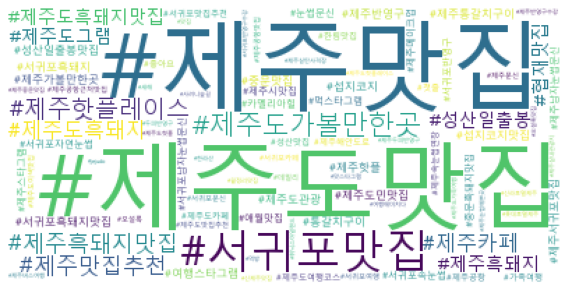

In [377]:
wordcloud = WordCloud(font_path= font_path,
            background_color = 'white',
            width = 400,
            height = 200,
            relative_scaling = 0.3,
            max_words = 100).generate_from_frequencies(tag_total_selected)
plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./word_cloud_class.png')
plt.show() # savefig보다 앞에넣으면 저장이 안됨

In [42]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import sys

rc('font',family = 'malgun gothic')

In [43]:
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50),columns = ['tags','counts'])
tag_count_df.head()

tag_count_df['tags'].replace('',None,inplace=True)
tag_count_df.dropna(subset=['tags'],inplace = True)
tag_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    50 non-null     object
 1   counts  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


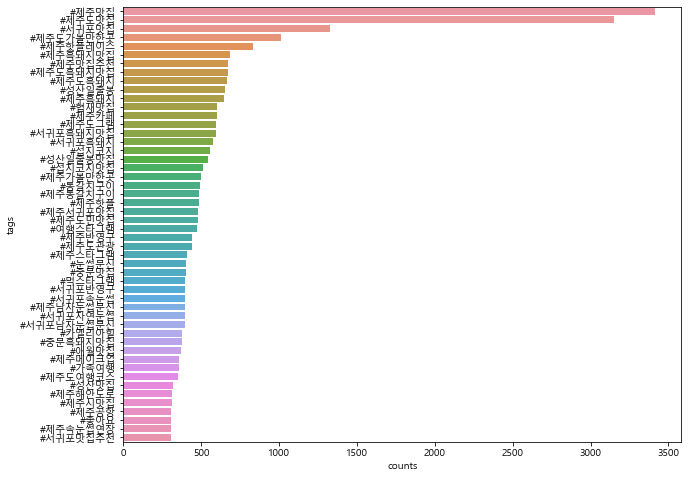

In [44]:
plt.figure(figsize =(10,8))
sns.barplot(x='counts',y = 'tags',
           data = tag_count_df)
plt.show()

In [45]:
#! pip install wordcloud

In [47]:
import pandas as pd

raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [48]:
location_counts = raw_total['place'].value_counts()

location_counts_df = pd.DataFrame(location_counts)
location_counts_df

,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59
...,...
제주마당,1
형제섬,1
동복해녀식당,1
종로 광장시장,1


In [49]:
locations = list(location_counts_df.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '캔디원',
 '사려니숲길',
 '하이엔드 제주',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '휴애리 자연생활공원',
 '옹포리',
 '삼무공원',
 '마마뜰',
 '제주어린왕자게스트하우스',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '성이시돌목장',
 '제주 송악산',
 '옹포별장가든',
 '월정리카페콧수염',
 '牛岛 Udo Island 우도',
 '곽지해수욕장',
 '카페브리프',
 '아줄레주',
 '에코랜드',
 '산굼부리',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 'Terarosa - 테라로사',

In [50]:
import requests

In [51]:
searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
url

'https://dapi.kakao.com/v2/local/search/keyword.json?query=합정 스타벅스'

In [52]:
headers = {
    'Authorization':'KakaoAK 5a2cbae26c6745c87ec0e75220704d09'
}

In [53]:
places = requests.get(url, headers = headers).json()['documents']
places[1]['place_name']
print('경도 =' , places[0]['x']) # 6번째 자리까지는 써야함
print('위도 =' , places[0]['y'])
places[0]['x']

경도 = 126.916980454434
위도 = 37.5514601750423


'126.916980454434'

In [54]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
    'Authorization':'KakaoAK 5a2cbae26c6745c87ec0e75220704d09'
    }
    places = requests.get(url, headers = headers).json()['documents']
    place = places[0]
    
    name = place['place_name']
    x = place['x']
    y = place['y']
    data = [name,x,y,searching]
    return data

In [55]:
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [56]:
from tqdm.notebook import tqdm

In [57]:
locations_inform = []

for location in tqdm(locations[:200]):
    try:
        locations_inform.append(find_places(location))
        time.sleep(1)
        
    except:
        pass
locations_inform

  0%|          | 0/200 [00:00<?, ?it/s]

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관', '126.32785786016811', '33.2915720831759', '제주도 크리스마스 박물관'],
 ['할로비치 본점', '126.2815248933638', '33.30832616522123', '할로비치'],
 ['제주에인감귤밭', '126.5390139270361', '33.25656069063887', '제주에인감귤밭'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관'],
 ['올레길 16코스(고내-광령 올레)', '126.38979561557086', '33.46649759191228', '제주도 애월읍'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['카멜리아힐', '126.370009467525', '33.2896344311608', '카멜리아 힐'],
 ['제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['유진푸드', '127.387893413315', '36.3562604784963', '밥깡패']

In [59]:
locations_inform_df = pd.DataFrame(locations_inform,columns = ['name_office','경도','위도','name'])
locations_inform_df.head()
locations_inform_df.to_excel('./3_locations_stu.xlsx',index = False)

In [70]:
location_counts_df = pd.read_excel('./files/3_location_counts.xlsx', index_col = 0)
location_inform_df = pd.read_excel('./files/3_locations.xlsx')

location_counts_df.head()
location_inform_df.head()

,name_official,경도,위도,인스타위치명
0,Jeju in aA,126.836504,33.538337,Jeju
1,서귀포잠수함,126.558616,33.239303,Seogwipo
2,바이나흐튼 크리스마스박물관,126.327864,33.291569,제주도 크리스마스 박물관
3,할로비치,127.020826,37.518211,할로비치
4,제주에인감귤밭,126.539410,33.256610,제주에인감귤밭


In [135]:
location_data = pd.merge(location_inform_df, location_counts_df, how = 'inner',left_on = 'name_official',right_index = True)
location_data

KeyError: 'name_office'

In [79]:
location_data['name_official'].value_counts()

오설록티뮤지엄           3
서귀포잠수함            2
천지연폭포             2
빌라드아토             2
비자림               2
                 ..
투썸플레이스 제주애월한담점    1
하늘고래              1
문쏘                1
성산일출봉             1
신풍목장              1
Name: name_official, Length: 416, dtype: int64

In [83]:
location_data = location_data.pivot_table(values = 'place',
                          index = ['name_official','경도','위도'],
                          aggfunc = 'sum')
location_data.sort_values(by = 'place',ascending = False)

,,,place
name_official,경도,위도,
할로비치,127.020826,37.518211,51
제주에인감귤밭,126.539410,33.256610,48
석부작박물관,126.536502,33.250403,36
위미동백나무군락,126.674731,33.272939,18
밥깡패,126.263436,33.410093,16
...,...,...,...
산방산,126.313425,33.241304,1
사이카레,126.381107,33.484245,1
사락,126.307741,33.228771,1


In [85]:
location_data.to_excel('./3location_inform.xlsx',index = False)

In [86]:
location_data.sort_values(by = 'place',ascending = False)

,,,place
name_official,경도,위도,
할로비치,127.020826,37.518211,51
제주에인감귤밭,126.539410,33.256610,48
석부작박물관,126.536502,33.250403,36
위미동백나무군락,126.674731,33.272939,18
밥깡패,126.263436,33.410093,16
...,...,...,...
산방산,126.313425,33.241304,1
사이카레,126.381107,33.484245,1
사락,126.307741,33.228771,1


In [87]:
import folium

In [127]:
# 기본좌표
latitude = 37.503575
longitude = 127.0498189

m = folium.Map(location = [latitude,longitude],
              width = 400,
              hight = 300,
              zoom_start = 12)
folium.Marker(location = [latitude,longitude],
             popup = '<iframe width="700" height="300" src="https://www.youtube.com/embed/n0PBhTABg7Q" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>', # 유트브 링크에 소스코드를 복사해서 넣으면 마크 클릭하면 출력 하이퍼 링크를 이용해서 해당 페이지로 이동하는 것도 있다
             tooltip = '선릉역 멀티캠퍼스',
             icon = folium.Icon(color = 'red',
                               icon_color = 'white',# default
                               icon = 'building', # default = info-sign
                               prefix = 'fa')).add_to(m) # font awesome에서 가져왔다 default = 'glyphicon'#https://fontawesome.com/v5.15/icons?d=gallery&p=2
folium.CircleMarker(location = [latitude,longitude],
                    color = 'toamato',
                    radius = 50,
                    tooltip = '활동반경'
                   ).add_to(m)
m

In [136]:
location_data = pd.read_excel('./files/3_location_inform.xlsx')
location_data.info()
location_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  416 non-null    object 
 1   경도             417 non-null    float64
 2   위도             417 non-null    float64
 3   place          417 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


,name_official,경도,위도,place
0,73st,126.455109,33.456989,1
1,가드망제,126.532954,33.500991,1
2,가배,126.505570,33.231541,1
3,가시식당,126.771438,33.353060,2
4,가시아방국수,126.918072,33.438605,2


In [205]:
Mt_Hanla = [33.362500,126.533694]
map_jeju = folium.Map(location = Mt_Hanla,
                     zoom_start = 11)
folium.TileLayer('openstreetmap').add_to(map_jeju) # default = 'openstreetmap' 어떤 지도를 바탕으로 하곘느냐 # https://deparkes.co.uk/2016/06/10/folium-map-tiles/
for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count*1  )
    lat = location_data['위도'][i]
    lng = location_data['경도'][i]
    ambition = folium.CircleMarker(location = [lat,lng],
                        radius = size,
                        color = 'red',
                        popup = name)
    ambition.add_to(map_jeju)
    
    
    
map_jeju

In [162]:
map_jeju.save('./file.html')

In [173]:
from folium.plugins import MarkerCluster

In [216]:
locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append([data['위도'],data['경도']])
    names.append(data['name_official'])

#locations
#names

Mt_Hanla = [33.362500,126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla,zoom_start = 11)

tiles = ['stamenwatercolor', 'cartodbpositron', 
         'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(map_jeju2)


maker_cluster = MarkerCluster(location=locations,
                             popup = names,
                             name = 'Jeju',
                             overlay = True,
                              control = True,
                             )
marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)
map_jeju2

In [218]:
map_jeju2.save('./file1.html')

In [219]:
### 특정단어 게시글 찾기
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [228]:
select_word = '해돋이'

check_list = []

for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)
check_list
select_df = raw_total[check_list]
len(select_df['content'])

50

In [238]:
for i in select_df.index:
    print(select_df.loc[i,'place'])
    print('-'*135)

서귀포 법환포구
---------------------------------------------------------------------------------------------------------------------------------------
Jeju-do
---------------------------------------------------------------------------------------------------------------------------------------
nan
---------------------------------------------------------------------------------------------------------------------------------------
제주프레임스파빌
---------------------------------------------------------------------------------------------------------------------------------------
nan
---------------------------------------------------------------------------------------------------------------------------------------
곽지스테이션
---------------------------------------------------------------------------------------------------------------------------------------
nan
---------------------------------------------------------------------------------------------------------------------------------------
광치기

In [293]:
def select_word(*word):
    number = input('1. 내용, 2. 날짜, 3. 좋아요, 4.장소, 5.태그')
    sele = []
    if number == '1':
        sub = 'content'
    elif number == '2':
        sub = 'date'
    elif number == '3':
        sub = 'like'
    elif number == '4':
        sub = 'place'
    elif number == '5':
        sub = 'tags'
    else:
        return print('다시 시도해주세요')
    for i in raw_total['content']:
        if i in word:
            sele.append(True)
        else:
            sele.append(False)
    if sele == None:
        print('{}가 포함된 인스타그램의 글이 없습니다.'.format(word))
        return
    select_df = raw_total[sele]
    print(select_df)
    for i in select_df.index:
        print(select_df.loc[i,sub])
        print('-'*135)
        
select_word('해돋이')

1. 내용, 2. 날짜, 3. 좋아요, 4.장소, 5.태그4
Empty DataFrame
Columns: [content, date, like, place, tags]
Index: []


In [312]:
select_word_list = ['해돋이','맛집','힐링','시츄']

def select_word(select_word_list):
    for select_word in select_word_list:
        check_list = []
        for content in raw_total['content']:
            if select_word in content:
                check_list.append(True)
            else:
                check_list.append(False)
        select_df = raw_total[check_list]
        fpath = './jeju/4_select_data_{}.xlsx'.format(select_word)
        select_df.to_excel(fpath,index=False)

In [313]:
select_word(select_word_list)


In [302]:
select_word_list

['해돋이', '맛집', '힐링']

In [314]:
import wordcloud

In [315]:
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [318]:
raw_total['tags'][:10]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3    ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4    ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
5    ['#제주에인감귤밭', '#감귤체험', '#귤따기체험', '#체험농장', '#감귤따...
6    ['#제주에인감귤밭', '#감귤체험', '#귤따기체험', '#체험농장', '#감귤따...
7    ['#niceweather', '#winterswimming', '#제주', '#바...
8              ['#제주에서한복입고여행하기', '#한복입는선흘집', '#파스텔제주']
9    ['#레드향', '#천혜향', '#한라봉', '#귤오름농원', '#귤농장', '#과...
Name: tags, dtype: object

In [327]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tags in tags_list:
        tags_total.append(tags)

tags_total

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

In [332]:
from collections import Counter
tag_counts = Counter(tags_total)

tag_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [334]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [335]:
font_path = 'c:/windows/Fonts/malgun.ttf'

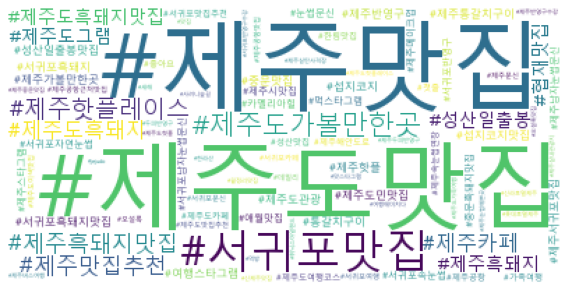

In [377]:
wordcloud = WordCloud(font_path= font_path,
            background_color = 'white',
            width = 400,
            height = 200,
            relative_scaling = 0.3,
            max_words = 100).generate_from_frequencies(tag_total_selected)
plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./word_cloud_class.png')
plt.show() # savefig보다 앞에넣으면 저장이 안됨

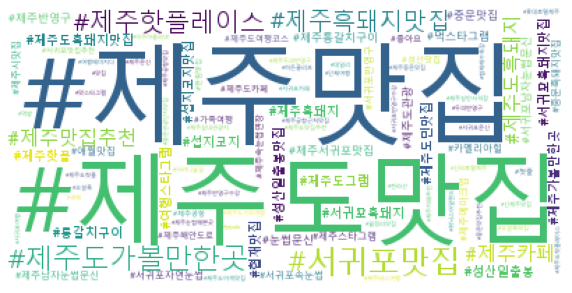

<Figure size 432x288 with 0 Axes>